In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("data_segunda-medicion.csv")

In [3]:
# Definimos las listas con V1 (Volumen de HCl para que el NaOH con fenolftaleína pase de rosa a transparente)\n",
V1_1 = np.array(data["#1"])[::2]
V1_2 = np.array(data["#2"])[::2]
V1_3 = np.array(data["#3"])[::2]
V1_4 = np.array(data["#4"])[::2]
                       
# Definimos las listas con V2 (Volumen agregado de HCl para que el NaOH con fenolftaleína y naranja de metilo pase de naranja a rojo)\n",
V2_1 = np.array(data["#1"])[1::2]
V2_2 = np.array(data["#2"])[1::2]
V2_3 = np.array(data["#3"])[1::2]
V2_4 = np.array(data["#4"])[1::2]

In [4]:
# Calculamos las diferencias de volumen que representan al CO2 atrapado en el NaOH\n",
DV_1 = V2_1 - V1_1 
DV_2 = V2_2 - V1_2
DV_3 = V2_3 - V1_3
DV_4 = V2_4 - V1_4

In [5]:
#agrego un 0 como primer valor
DV_1 = np.insert(DV_1, 0, 0., axis=0)
DV_2 = np.insert(DV_2, 0, 0., axis=0)
DV_3 = np.insert(DV_3, 0, 0., axis=0)
DV_4 = np.insert(DV_4, 0, 0., axis=0)

In [6]:
#DV_2=DV_2+np.array([0,0,0.4,0.4,0.4,0.4]) #Una trampita que estaba probando

In [8]:
#Los días, salteando los días que no vamos (domingos)
x=np.array([0,1,3,4,5,6,7,8,10])

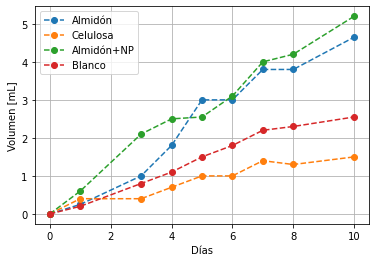

In [9]:
plt.plot(x,DV_1,'o--',label='Almidón')
plt.plot(x,DV_2,'o--',label='Celulosa')
plt.plot(x,DV_3,'o--',label='Almidón+NP')
plt.plot(x,DV_4,'o--',label='Blanco')
plt.legend()
plt.grid(True)
plt.xlabel('Días')
plt.ylabel('Volumen [mL]')
plt.show()

In [10]:
def gramos(x):#meter el volumen de la diferencia
    return x*0.5*0.5*44/5

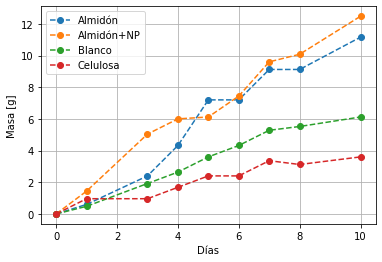

In [23]:
plt.plot(x,gramos(DV_1)*24/22,'o--',label='Almidón')
plt.plot(x,gramos(DV_3)*24/22,'o--',label='Almidón+NP')
plt.plot(x,gramos(DV_4)*24/22,'o--',label='Blanco')
plt.plot(x,gramos(DV_2)*24/22,'o--',label='Celulosa')
plt.legend()
plt.grid(True)
plt.xlabel('Días')
plt.ylabel('Masa [g]')
plt.savefig('titulacion-segunda_medicion.png')
plt.show()

In [12]:
DV_1

array([0.  , 0.25, 1.  , 1.8 , 3.  , 3.  , 3.8 , 3.8 , 4.65])

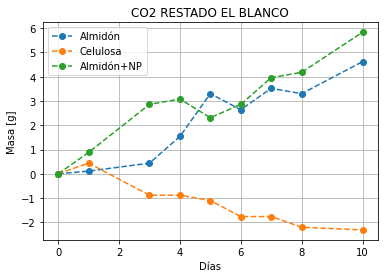

In [13]:
plt.title('CO2 RESTADO EL BLANCO')
plt.plot(x,gramos(DV_1)-gramos(DV_4),'o--',label='Almidón')
plt.plot(x,gramos(DV_2)-gramos(DV_4),'o--',label='Celulosa')
plt.plot(x,gramos(DV_3)-gramos(DV_4),'o--',label='Almidón+NP')
plt.legend()
plt.grid(True)
plt.xlabel('Días')
plt.ylabel('Masa [g]')
plt.savefig('segunda_medicion_restado.png')
plt.show()

# Chanteando

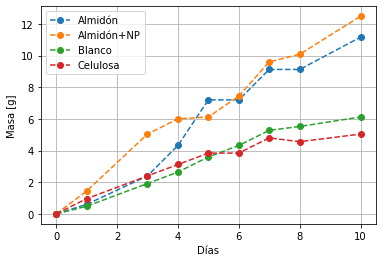

In [24]:
plt.plot(x,gramos(DV_1)*24/22,'o--',label='Almidón')
plt.plot(x,gramos(DV_3)*24/22,'o--',label='Almidón+NP')
plt.plot(x,gramos(DV_4)*24/22,'o--',label='Blanco')
plt.plot(x,(gramos(DV_2) +np.array([0,0,1.32,1.32,1.32,1.32,1.32,1.32,1.32]))*24/22,'o--',label='Celulosa')
plt.legend()
plt.grid(True)
plt.xlabel('Días')
plt.ylabel('Masa [g]')
plt.savefig('titulacion-segunda_medicion_CHANTA.png')
plt.show()

In [21]:
gramos(DV_2) +np.array([0,0,1.32,1.32,1.32,1.32,1.32,1.32,1.32])

array([0.  , 0.88, 2.2 , 2.86, 3.52, 3.52, 4.4 , 4.18, 4.62])